In [53]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the combine_data_zip file
combine_data_zip = pd.read_csv('combine_data_zip.csv')

In [54]:
# Print the column names in the DataFrame to identify the correct column names
print(combine_data_zip.columns)


Index(['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', '2006', '2009',
       '2019', '2023', 'RecPr', 'RevPr', 'CovPr', 'TotPr', 'RecPc', 'RevPc',
       'CovPc', 'TotPc', 'coordinates'],
      dtype='object')


In [55]:
# Extract the specific values from cells K46, L46, and M46
value_K46 = combine_data_zip.iloc[0]['RecPr']
value_L46 = combine_data_zip.iloc[0]['RevPr']
value_M46 = combine_data_zip.iloc[0]['CovPr']

In [56]:
# Melt the dataset to have 'Year' as a column
combine_data_melted = combine_data_zip.melt(id_vars=['zip', 'lat', 'lng', 'city', 'state_id', 'state_name'],
                                            value_vars=['RecPr', 'RevPr', 'CovPr'],
                                            var_name='PriceType',
                                            value_name='Price')


In [57]:
# Create a 'Year' column and repeat the years for each row
combine_data_melted['Year'] = pd.Series([2006, 2009, 2019, 2023] * (len(combine_data_melted) // 4))

In [58]:
# Sort the melted data by 'Price' in ascending order
combine_data_melted = combine_data_melted.sort_values(by='Price', ascending=True)


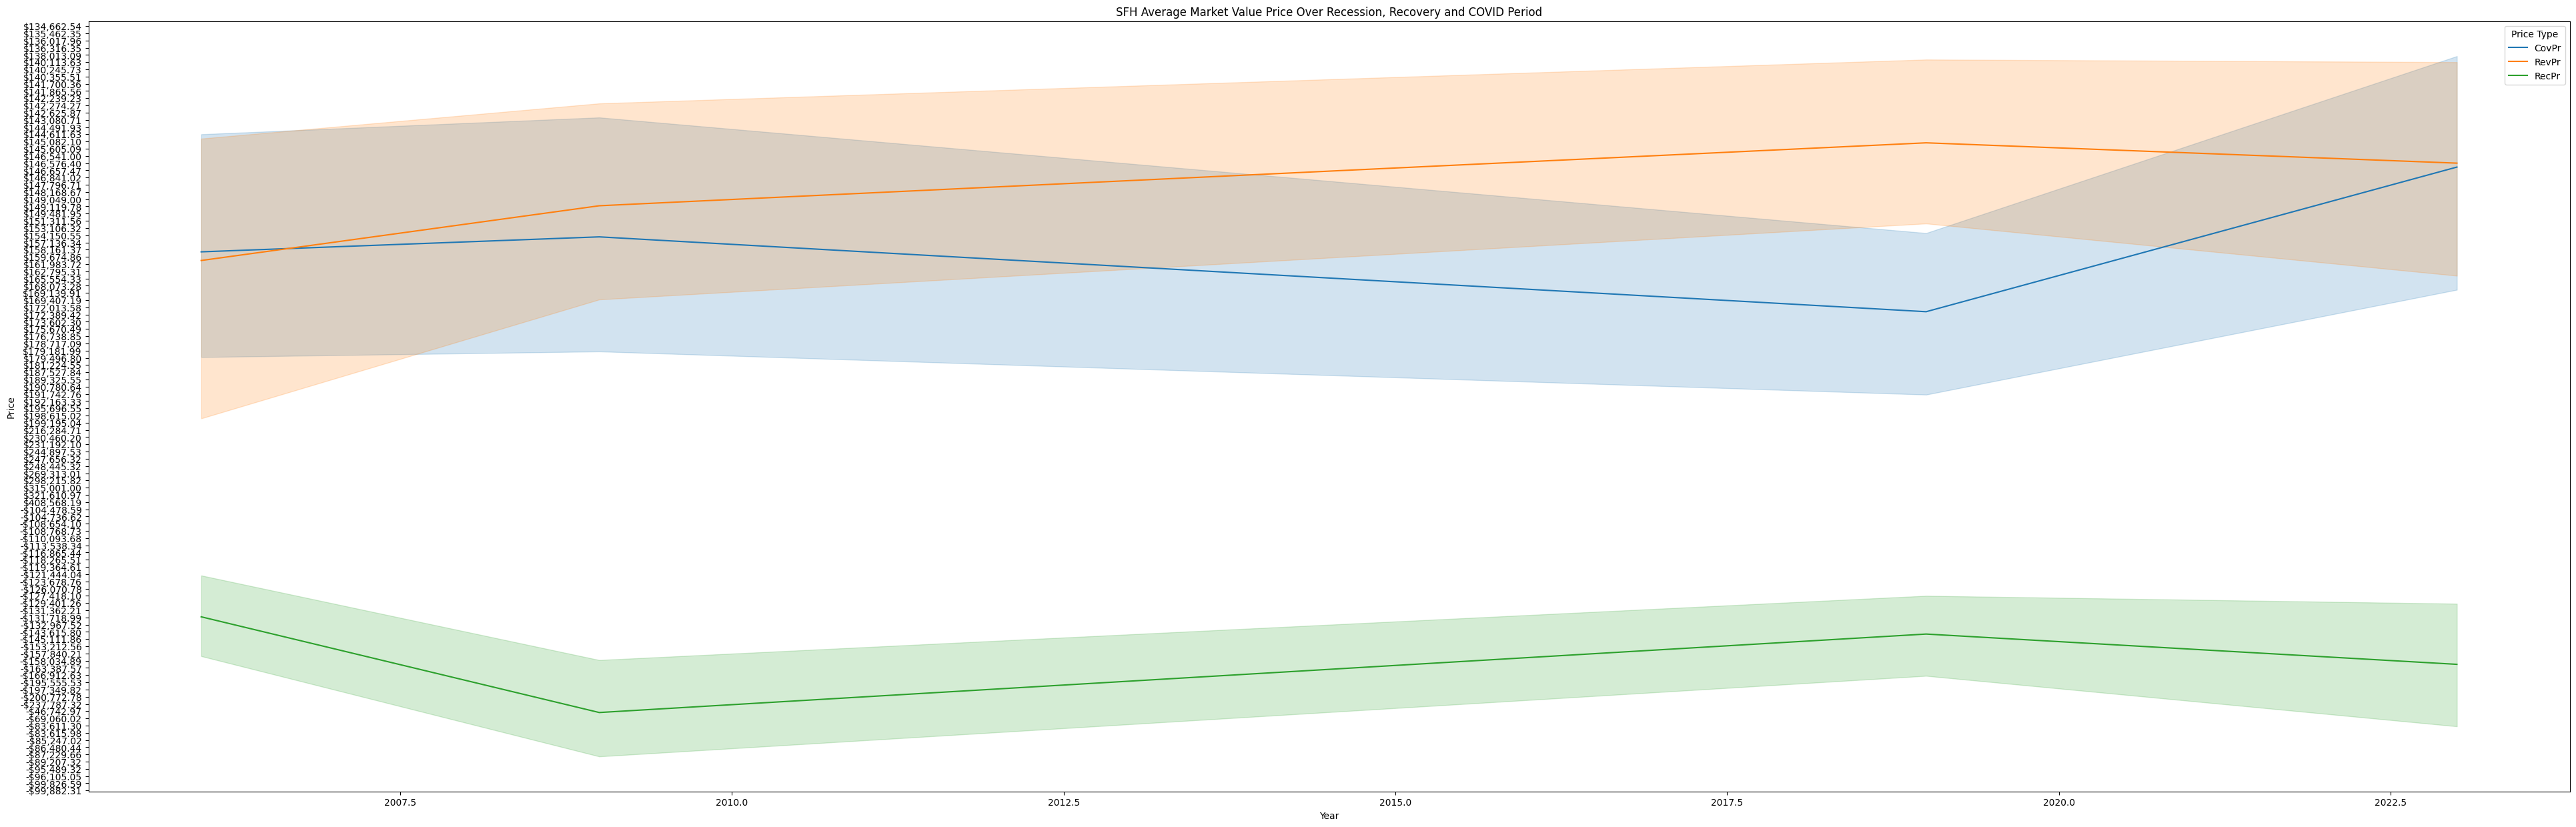

In [63]:
# Plot the line chart for RecPr, RevPr, CovPr over time
plt.figure(figsize=(48, 15))

# Use seaborn lineplot to plot 'Price' over 'Year' with 'PriceType' as the hue
sns.lineplot(x='Year', y='Price', hue='PriceType', data=combine_data_melted)

# Add title and labels
plt.title('SFH Average Market Value Price Over Recession, Recovery and COVID Period')
plt.xlabel('Year')
plt.ylabel('Price')

# Save the plot as a PNG file
plt.savefig('SFH_Average_Market_Value_Price.png', bbox_inches='tight')

# Show the plot
plt.legend(title='Price Type')
plt.show()